In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# create path for local
path_in = r'C:\Users\Lavy Ngo\Desktop\CS5530\Assignment1\StudentPerformance_project\data_raw\StudentsPerformance.csv'
path_out = r'C:\Users\Lavy Ngo\Desktop\CS5530\Assignment1\StudentPerformance_project\data_clean\clean_data.csv'

# read data from a raw file
# data = pd.read_csv(path_in)
data = pd.read_csv('/content/StudentsPerformance.csv')
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [6]:
# rename some of the header for better spacing
data = data.rename(columns={'gender':'Gender', 
                            'race/ethnicity': 'Race/Ethnicity',
                            'parental level of education': 'Parent_education_level',
                            'lunch': 'Lunch',
                            'test preparation course': 'Test_preparation_course',
                            'math score': 'Math_score',
                            'reading score': 'Reading_score',
                            'writing score': 'Writing_score'})
data

,Gender,Race/Ethnicity,Parent_education_level,Lunch,Test_preparation_course,Math_score,Reading_score,Writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [7]:
# create an average score column
data['Average_score'] = data[['Math_score', 'Reading_score', 'Writing_score']].mean(axis=1).round(4)
data

,Gender,Race/Ethnicity,Parent_education_level,Lunch,Test_preparation_course,Math_score,Reading_score,Writing_score,Average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.6667
1,female,group C,some college,standard,completed,69,90,88,82.3333
2,female,group B,master's degree,standard,none,90,95,93,92.6667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.3333
4,male,group C,some college,standard,none,76,78,75,76.3333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.0000
996,male,group C,high school,free/reduced,none,62,55,55,57.3333
997,female,group C,high school,free/reduced,completed,59,71,65,65.0000
998,female,group D,some college,standard,completed,68,78,77,74.3333


Gender
female    63.633205
male      68.728216
Name: Math_score, dtype: float64


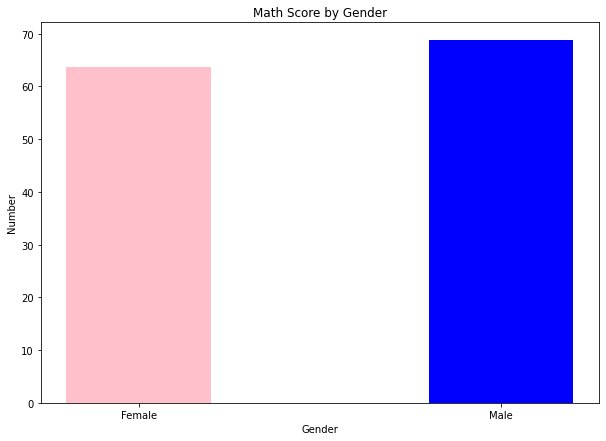

In [8]:
# show the average math score by gender (male or female)
rate = data.groupby(['Gender'])['Math_score'].mean()
print(rate)

# figure size
fig = plt.figure(figsize =(10, 7))

# display 
plt.bar(['Female','Male'], rate, color=['pink', 'blue'], width = 0.4)
plt.xlabel("Gender")
plt.ylabel("Number")
plt.title("Math Score by Gender")
plt.show()

From a graph above, male students have a better average math grade than female ones

Gender
female    69.569498
male      65.837481
Name: Average_score, dtype: float64


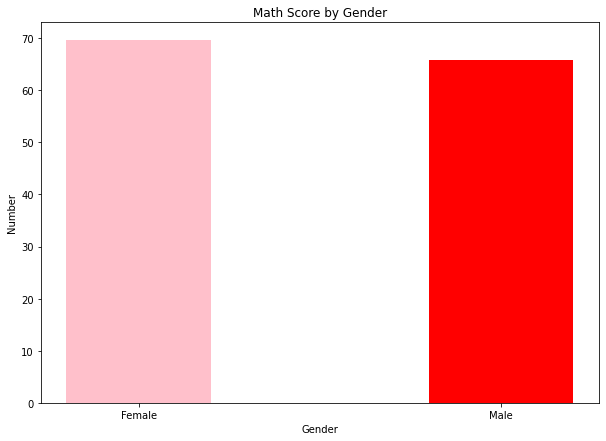

In [9]:
# show the average TOTAL score by gender (male or female)
rate = data.groupby(['Gender'])['Average_score'].mean()
print(rate)

# figure size
fig = plt.figure(figsize =(10, 7))

# display 
plt.bar(['Female','Male'], rate, color=['pink', 'red'], width = 0.4)
plt.xlabel("Gender")
plt.ylabel("Number")
plt.title("Math Score by Gender")
plt.show()

From a graph above, female students have a better average total grade than male ones

Gender
female    518
male      482
Name: Gender, dtype: int64


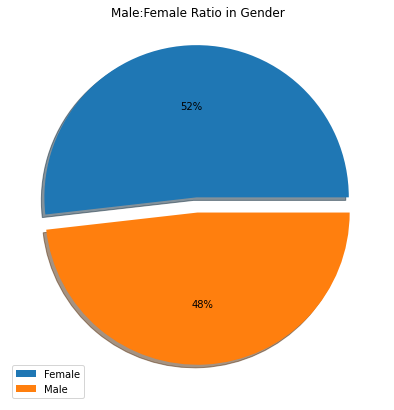

In [10]:
myexplode = [0.1, 0]

# Male:Female Ratio in Gender
rate = data.groupby(['Gender'])['Gender'].count()
print(rate)

# figure size
fig = plt.figure(figsize =(10, 7))

# display
plt.pie(rate, autopct='%1.0f%%', explode=myexplode, shadow=True)
plt.legend(labels=['Female','Male'])
plt.title("Male:Female Ratio in Gender")
plt.show()

Based on what we see from the figure above, we can easily see there are not so many different numbers between males and females (52 for females and 48 for males) 

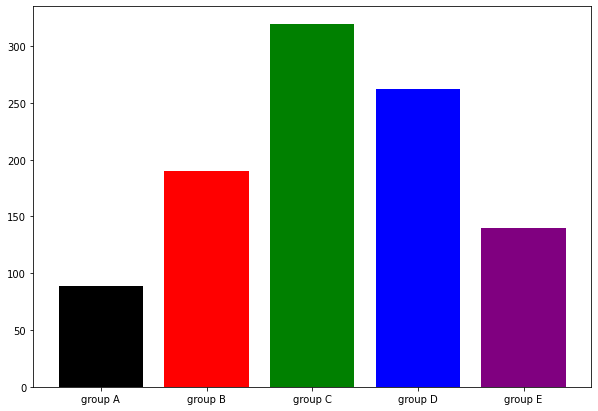

In [11]:
# Group the table by 'Race/Ethnicity' column and count the number of parent in this column
race_ratio = data.groupby(['Race/Ethnicity'])['Race/Ethnicity'].count()
race_ratio

# figure size
fig = plt.figure(figsize =(10, 7))

# display
values = ['group A', 'group B', 'group C', 'group D', 'group E']
plt.bar(values, race_ratio, color=['black', 'red', 'green', 'blue', 'purple'])
plt.show()


The graph above shows that most of the students are from group C, and group D. Group A has the least amount of students.

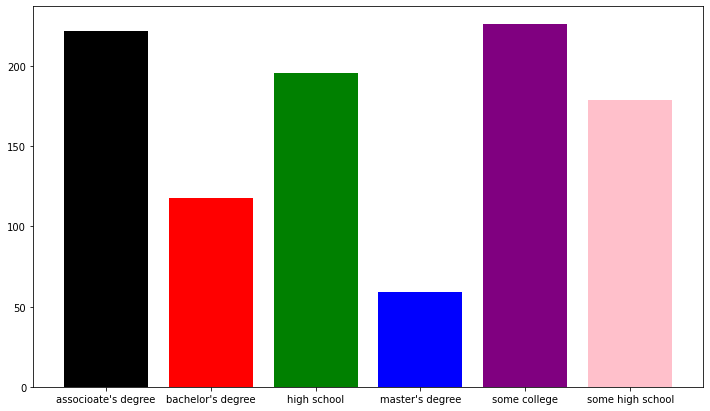

In [15]:
# Group the table by 'Parent_education_level' column and count the number of parent in this column
race_ratio = data.groupby(['Parent_education_level'])['Parent_education_level'].count()
race_ratio

# figure size
fig = plt.figure(figsize =(12, 7))

# display
values = ['associoate\'s degree', 'bachelor\'s degree', 'high school', 'master\'s degree', 'some college', 'some high school']
plt.bar(values, race_ratio, color=['black', 'red', 'green', 'blue', 'purple', 'pink'])
plt.show()

The graph above shows the parent's education level; there are 6 different levels